In [32]:
import data
import tensorflow as tf
import train

Data Loading and Processing

In [33]:
handlr = data.Train_Data('D:/DS/Learnin/Essex MS/CE888/git/CE888/assignment2/seq2seq/spider/',['train_spider.json','train_others.json'])
input_text_processor = data.Features().vectorizor(handlr.questions , data.Max_Vocab_Size)
output_text_processor = data.Features().vectorizor(handlr.sql , data.Max_Vocab_Size)

Reading file at path D:/DS/Learnin/Essex MS/CE888/git/CE888/assignment2/seq2seq/spider/train_spider.json
7000 Rows in Total
Reading file at path D:/DS/Learnin/Essex MS/CE888/git/CE888/assignment2/seq2seq/spider/train_others.json
8659 Rows in Total
Filter Easy Queries
Splittin the Train and Test data
(727, 7)
Data for Training (2908, 7)
Data for Testing (727, 7)
Sample Vocabulary ['', '[UNK]', 'the', '[start]', '[end]', 'of', '?', '.', 'what', 'are']
Sample Vocabulary ['', '[UNK]', 'select', 'from', '[start]', '[end]', 'where', ')', '(', '=']


Getting the List of Questions in inp and List of Queries as target

In [34]:
inp = handlr.questions
targ = handlr.sql

In [35]:
BUFFER_SIZE = len(inp)
BATCH_SIZE = data.BATCH_SIZE

In [36]:
dataset = tf.data.Dataset.from_tensor_slices((inp, targ)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)

In [37]:
embedding_dim = data.embedding_dim
units = data.units

In [38]:
train_translator = train.TrainTranslator(
    embedding_dim, units,
    input_text_processor=input_text_processor,
    output_text_processor=output_text_processor,
    use_tf_function = True)

# Configure the loss and optimizer
train_translator.compile(
    optimizer=tf.optimizers.Adam(),
    loss = train.MaskedLoss(),
)

In [39]:
batch_loss = train.BatchLogs('batch_loss')
run_logdir = train.get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [41]:
history = train_translator.fit(dataset, epochs=1, callbacks=[batch_loss,tensorboard_cb])

46/46 [==============================] - 125s 3s/step - batch_loss: 4.0025


Text(0, 0.5, 'Batch Loss')

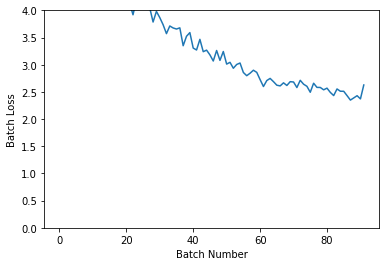

In [14]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(8, 6), dpi=200)
plt.plot(batch_loss.logs)
plt.ylim([0, 4])
plt.xlabel('Batch Number')
plt.ylabel('Batch Loss')


In [15]:
translator = train.Translator(
    encoder=train_translator.encoder,
    decoder=train_translator.decoder,
    input_text_processor=input_text_processor,
    output_text_processor=output_text_processor,
)

In [17]:
%%time
input_text = tf.constant([
    'How many singers do we have?', # "It's really cold here."
    'What is the total number of singers?', # "This is my life.""
])

result = translator.translate(
    input_text = input_text)

print(result['text'][0].numpy().decode())
print(result['text'][1].numpy().decode())
print()

select name from ref_document_types where role_code = "kentucky";
select sum from apartments where state = pets_allowed_yn

Wall time: 165 ms


In [18]:
test = list(handlr.df_test['question'].values)

input_text = tf.constant(test)

result = translator.translate(
    input_text = input_text)

print(result['text'][0].numpy().decode())
print(result['text'][1].numpy().decode())
print()

select sum ( age ) from person
select count ( distinct river_name ) from department



In [19]:
query = handlr.df_test['query'].values

Accuracy is 0.14 %


In [30]:
def exact_match_accuracy(query,result):
    count = 0
    for i in range(len(query)):
        pred = result['text'][i].numpy().decode().lower().replace(' ','')
        act = query[i].lower().replace(' ','')
        if pred == act:
            count = count +1
    print("Accuracy is {:.2f} %".format(count*100/len(query)))

In [ ]:
exact_match_accuracy(query,result)

In [ ]:
# run_2022_04_25-13_08_09